# Import Packages

In [1]:
from experiment import classic_experiment as ce
from architecture import classic_architectures as ca
from functionalities import gpu 

# Set Training Parameters

In [2]:
num_epoch = 10
batch_size = 128
lr_init = 1e-3
milestones = [5, 8, 10]
model = ca.get_alexnet()
modelname = "classic_artset_alexnet"
number_dev = 3

device = gpu.get_device(number_dev)
print(device)

cuda


# Training

In [3]:
import PIL.Image
PIL.Image.MAX_IMAGE_PIXELS = None

In [3]:
cl_exp = ce.classic_experiment(num_epoch, batch_size, lr_init, milestones, model, modelname, device)
cl_exp.get_dataset("artset")
#cl_exp.train()

Device used for further computation is: cuda


# Plots

In [8]:
#cl_exp.plot_loss()

In [6]:
cl_exp.load_model()

In [11]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [20]:
model = cl_exp.model
print(model.features[:11]) 

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


In [29]:
import numpy as np
import torch
from torch.autograd import Variable
from pytorch2keras import pytorch_to_keras
# we should specify shape of the input tensor
input_np = np.random.uniform(0, 1, (1, 3, 224, 224))
input_var = Variable(torch.FloatTensor(input_np))


k_model = pytorch_to_keras(model.cpu(), input_var, [(3, 224, 224)], verbose=True) 

W0716 15:43:17.447408 139671099246400 converter.py:42] Custom shapes isn't supported now.


graph(%input_0 : Float(1, 3, 224, 224),
      %features.0.weight : Float(64, 3, 11, 11),
      %features.0.bias : Float(64),
      %features.3.weight : Float(192, 64, 5, 5),
      %features.3.bias : Float(192),
      %features.6.weight : Float(384, 192, 3, 3),
      %features.6.bias : Float(384),
      %features.8.weight : Float(256, 384, 3, 3),
      %features.8.bias : Float(256),
      %features.10.weight : Float(256, 256, 3, 3),
      %features.10.bias : Float(256),
      %classifier.1.weight : Float(4096, 9216),
      %classifier.1.bias : Float(4096),
      %classifier.4.weight : Float(4096, 4096),
      %classifier.4.bias : Float(4096),
      %classifier.6.weight : Float(136, 4096),
      %classifier.6.bias : Float(136)):
  %17 : Float(1, 64, 55, 55) = onnx::Conv[dilations=[1, 1], group=1, kernel_shape=[11, 11], pads=[2, 2, 2, 2], strides=[4, 4]](%input_0, %features.0.weight, %features.0.bias), scope: AlexNet/Sequential[features]/Conv2d[0]
  %18 : Float(1, 64, 55, 55) = onnx::Relu

W0716 15:43:19.143450 139671099246400 deprecation_wrapper.py:119] From /export/home/yveniche/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 15:43:19.171697 139671099246400 deprecation_wrapper.py:119] From /export/home/yveniche/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0716 15:43:19.172728 139671099246400 deprecation_wrapper.py:119] From /export/home/yveniche/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0716 15:43:19.173671 139671099246400 deprecation_wrapper.py:119] From /export/home/yveniche/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:186: The name tf.Session is deprecated. Please

In [30]:
img_path = 'img_ass.jpg'

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
np.transpose(img_tensor, (0, 2, 3, 1)).shape
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 3, 224, 224)


TypeError: Invalid dimensions for image data

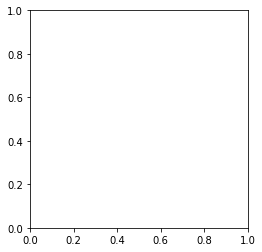

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(img_tensor[0])
plt.show()

In [21]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [model.features[:i] for i in [1, 4, 7, 9, 11]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

AttributeError: 'AlexNet' object has no attribute 'input'